# **Lecture 19: AI APIs and OpenAI APIs**

**Author Name :** Ahsan Ali Rajpoot  
- **LinkedIn :** [linkedin.com/in/iamahsanalirajpoot](https://www.linkedin.com/in/iamahsanalirajpoot)  
- **Facebook :** [facebook.com/iamahsanalirajpoot](https://www.facebook.com/iamahsanalirajpoot)  
- **GitHub :** [github.com/iamahsanalirajpoot](https://github.com/iamahsanalirajpoot)  
- **Kaggle :** [kaggle.com/ahsanalirajpoot](https://www.kaggle.com/ahsanalirajpoot)

## **What are AI APIs?**

- AI APIs let your programs use powferful AI models without needing to build or train them yourself.
- Example of AI APIs tasks:

  - `Generation`: Create text, images, or audio.
  - `Classification`: Sort data into categories.
  - `Translation`: Convert text from one language to another.
  - `Summarization`: Shorten long texts while keeping key points.
  - `Sentiment Analysis`: Determine if text is positive, negative, or neutral.
  - `Speech Recognition`: Convert spoken words into text.

- You send a request and receive AI-generated response.

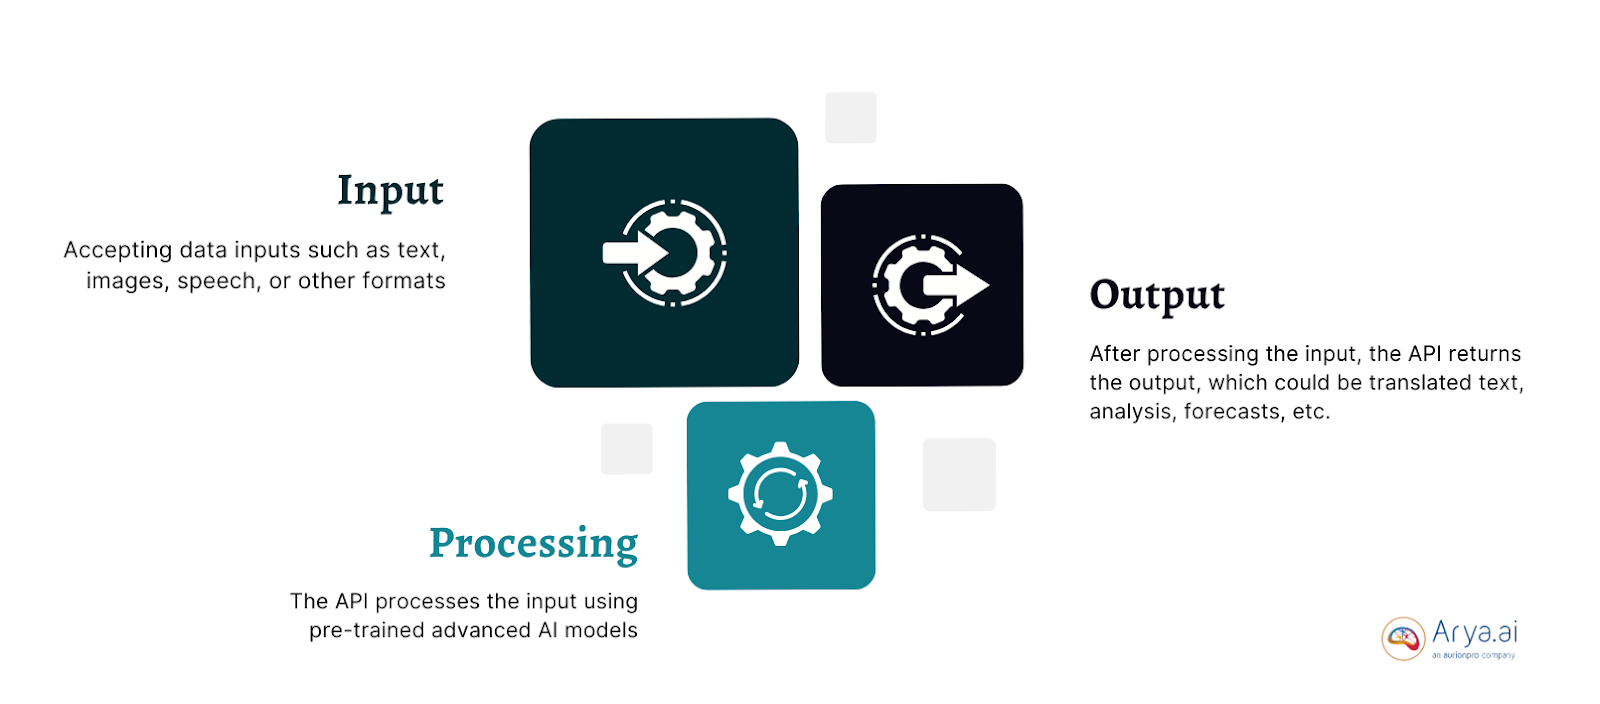

## **Why use API Keys?**

1. Prevent unauthorized access to the service.
2. Limit the number of requests per user to avoid overloading the service.
3. Help service providers track and charge usage fairly.
4. Think of API keys like an invitation of private event.



## **How to Get an API Keys?**

In this notebook, we will be use OpenAI API.

### **How to Get OpenAI API Key:**

1. Go to [platform.openai.com](https://platform.openai.com/docs/overview).
2. Create an account or log in.

![Screenshot 2025-07-22 223646.png](<attachment:Screenshot 2025-07-22 223646.png>)
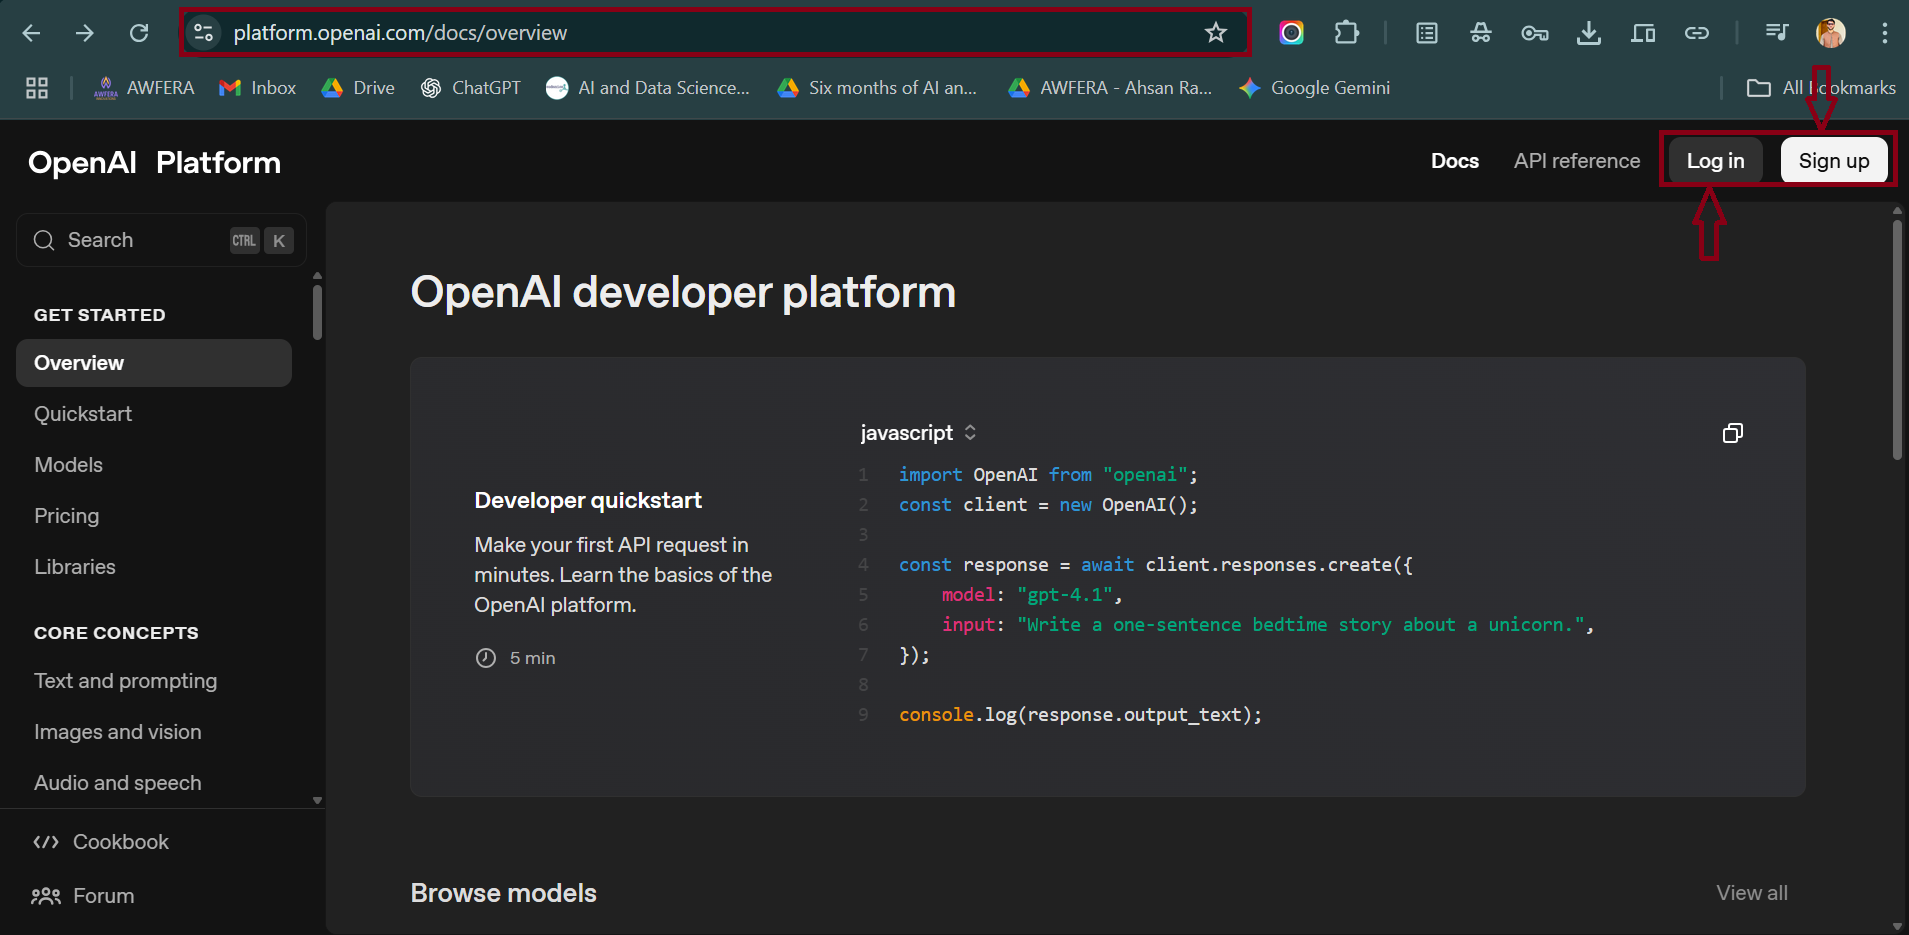

3. Navigate to the [API keys section](https://platform.openai.com/settings/organization/api-keys).

![Screenshot 2025-07-22 224842.png](<attachment:Screenshot 2025-07-22 224842.png>)
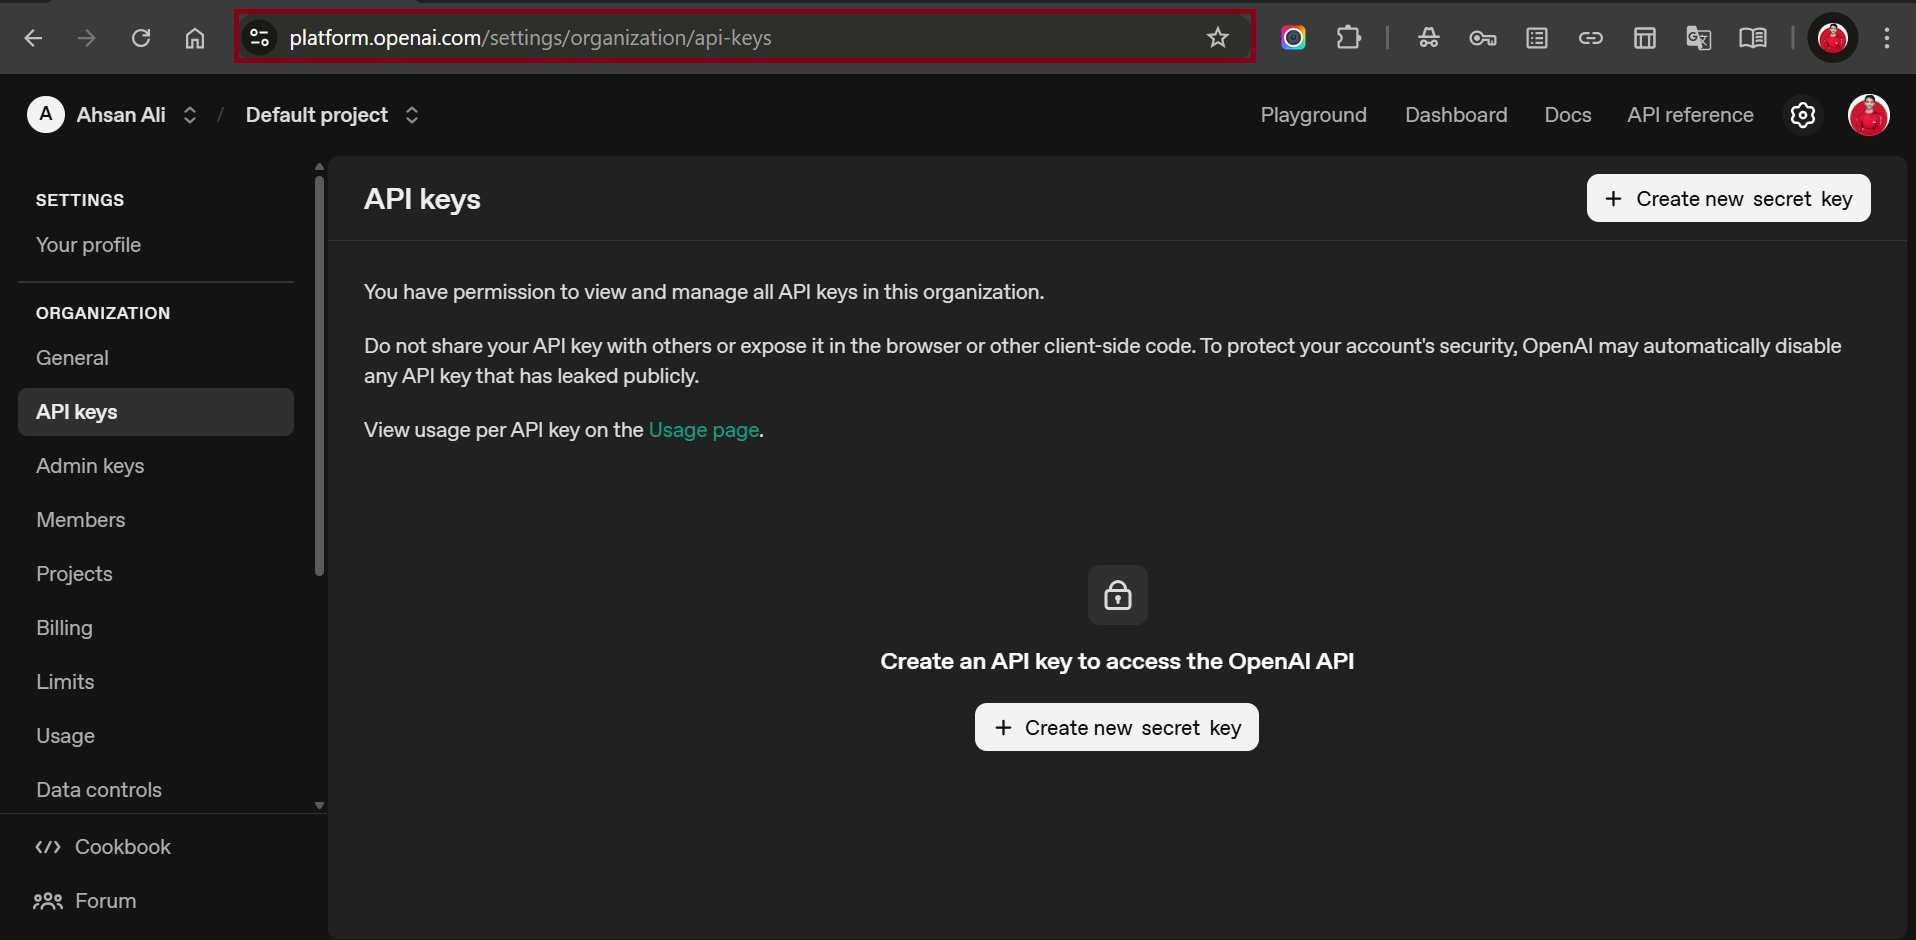

4. Click "Create new secret key" and copy the key.

![Screenshot 2025-07-22 225537.png](<attachment:Screenshot 2025-07-22 225537.png>)
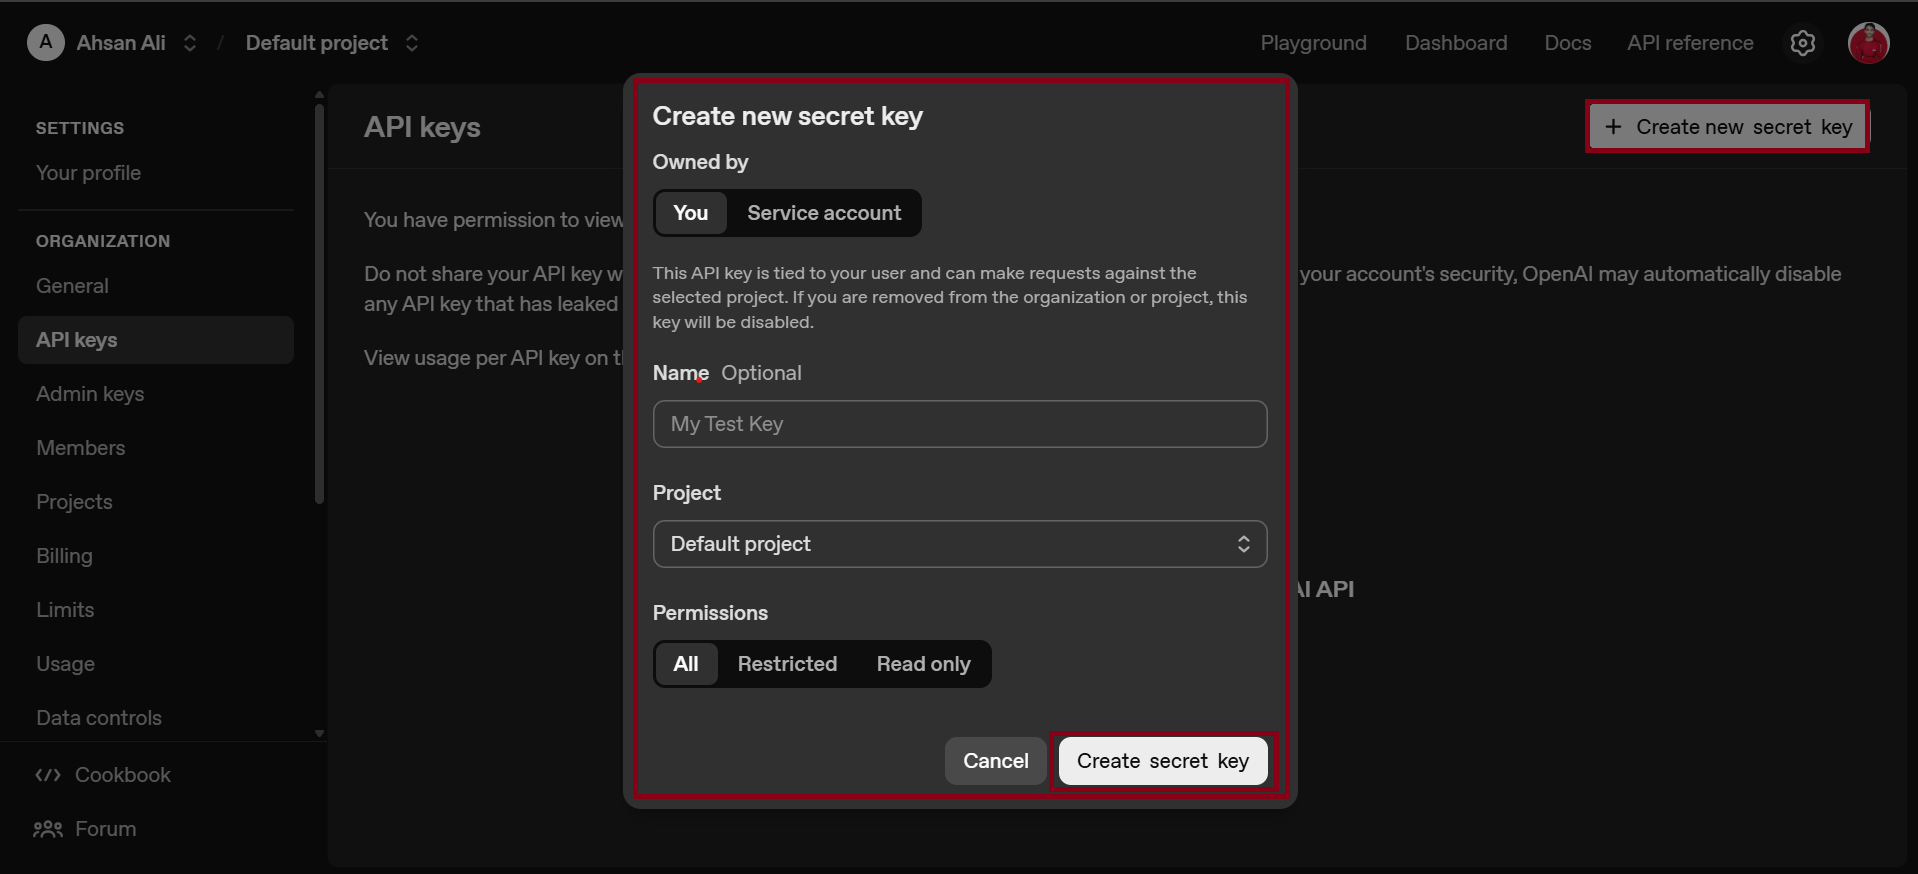

> Note: OpenAI API keys are not free. You need to add Credit balance to your OpenAI account to use the API and yu will be charged based on your usage.

![Screenshot 2025-07-22 230049.png](<attachment:Screenshot 2025-07-22 230049.png>)
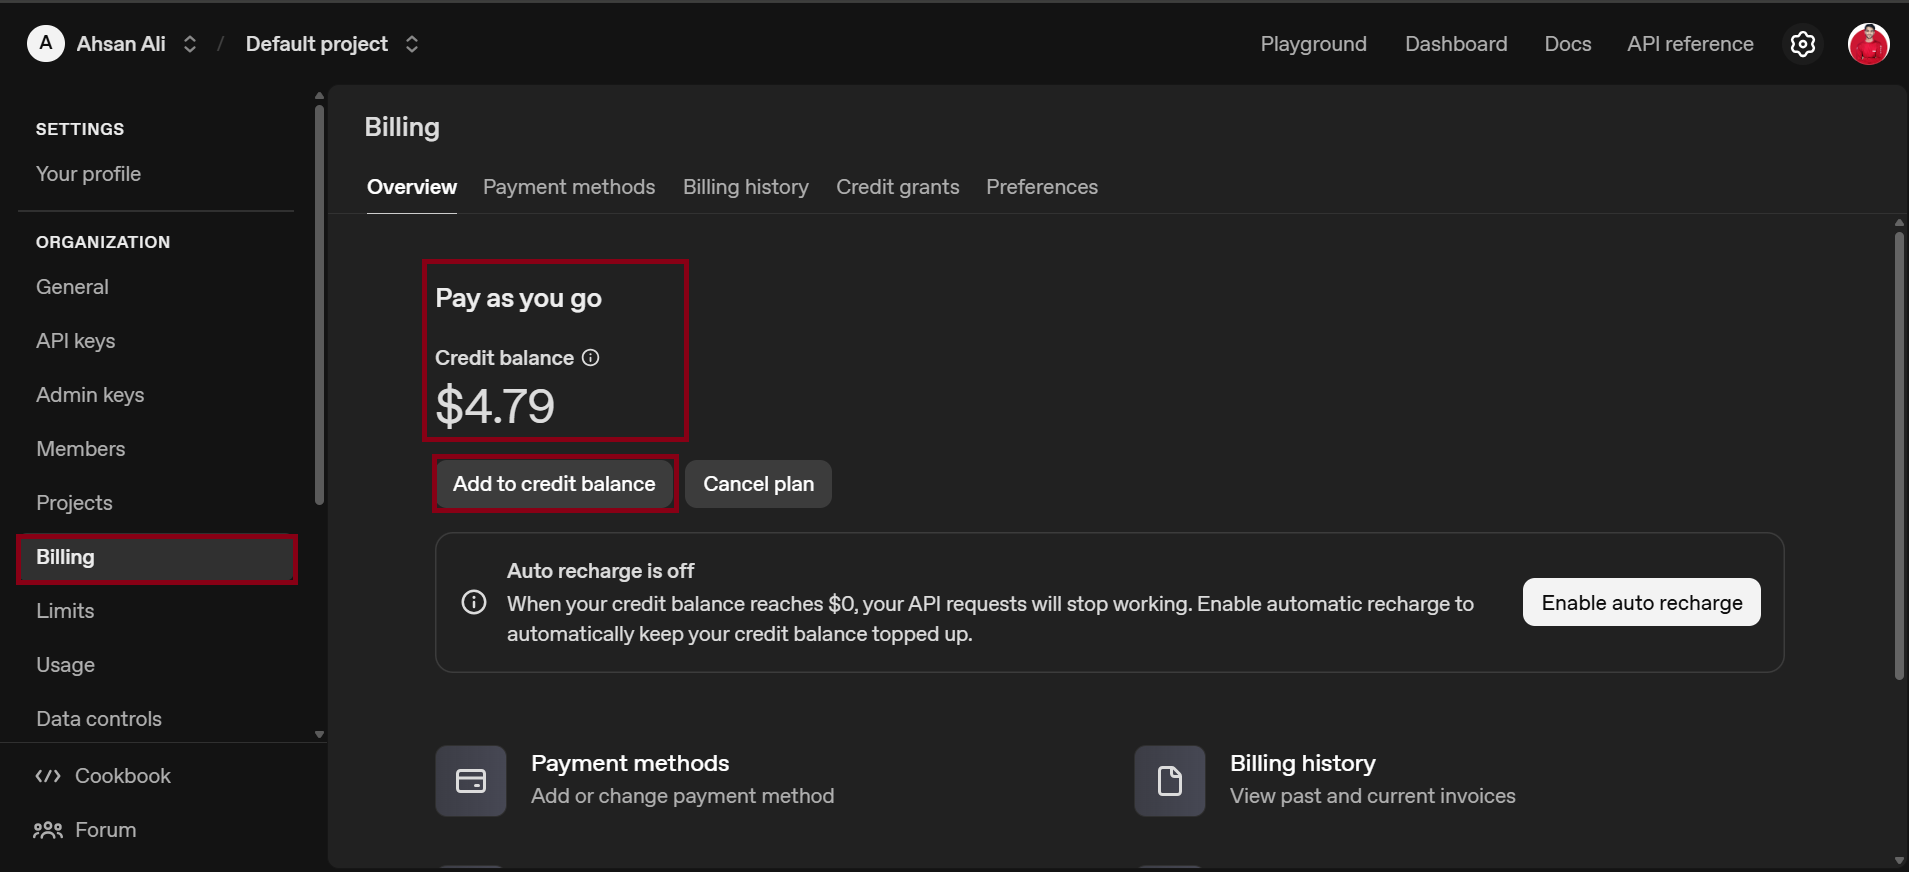

> Note: Always keep your API keys secret. Do not share them publicly, using `.env` files helps keep your API key safe.

## **Creating and Using ENV Files**

**What is an ENV File?**

An ENV file (with `.env` extension) is a simple text file that stores sensitive information like API keys separate from your main code.

let's see how to create and use an ENV file:

### **Step 1:**

#### **Creating `.env` File**

Create a new file in your project folder and name it exactly ".env" (note the dot at the beginning and no other file extension)

![Screenshot 2025-07-22 221928.png](<attachment:Screenshot 2025-07-22 221928.png>)
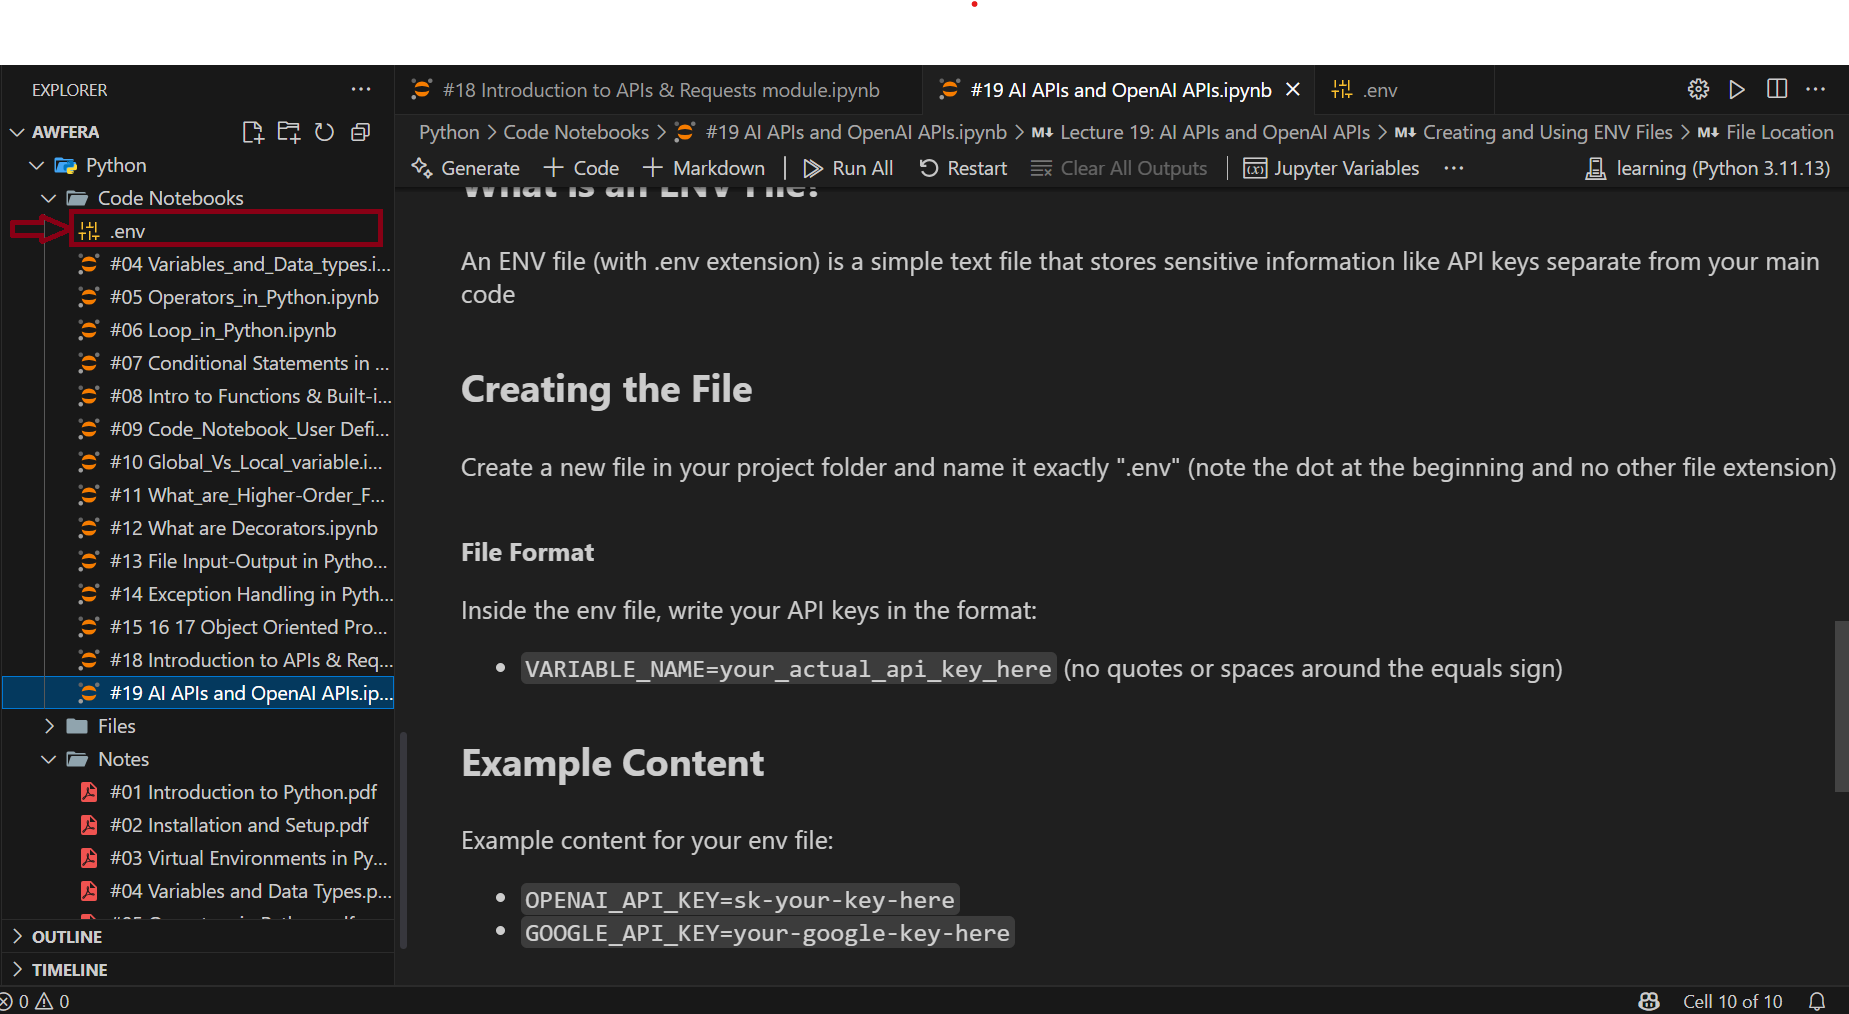

#### **File Format**

Inside the env file, write your API keys in the format: 
- `VARIABLE_NAME=your_actual_api_key_here` (no quotes or spaces around the equals sign)

![Screenshot 2025-07-22 222424.png](<attachment:Screenshot 2025-07-22 222424.png>)
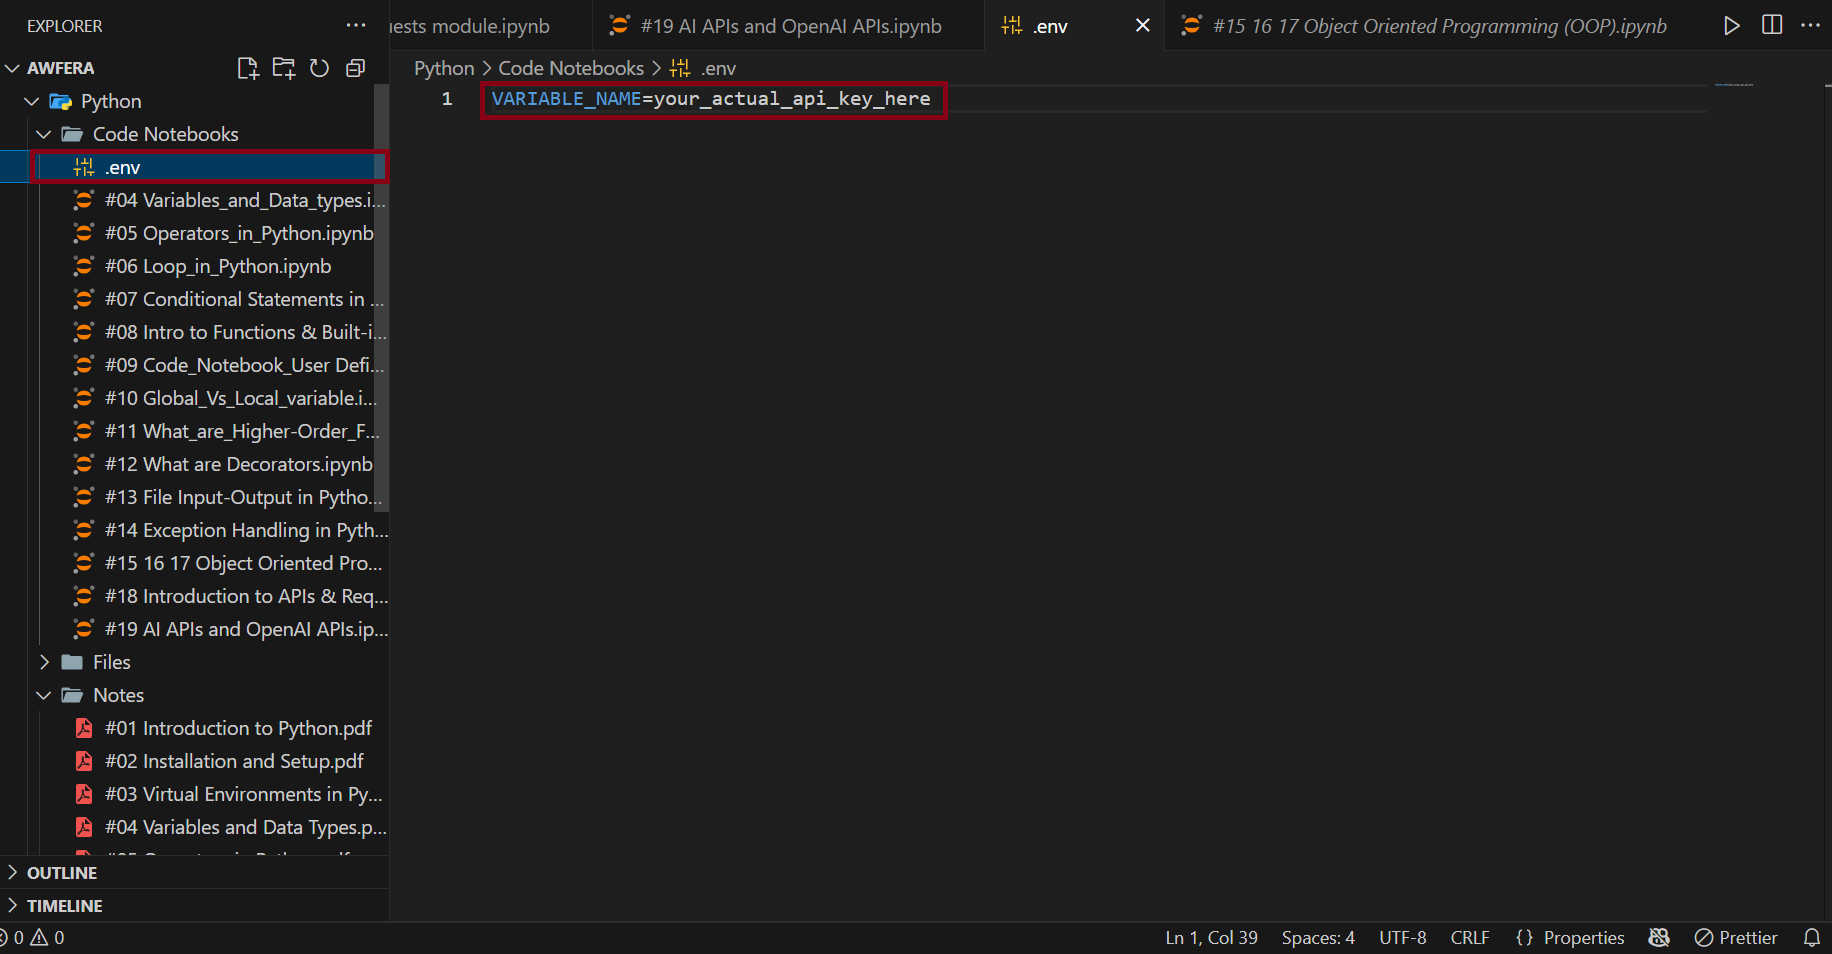

#### **Example Content**

Example content for your env file: 
- `OPENAI_API_KEY=sk-your-key-here`  
- `GOOGLE_API_KEY=your-google-key-here`

#### **File Location**

Save the env file in the same folder as your Python script so your program can find and read it when needed

### **Step 2:**

#### **Install python-dotenv**

To read the `.env` file in your Python code, you need to install the `python-dotenv` package. You can do this using pip:

- `pip install python-dotenv`


In [30]:
!pip install python-dotenv

### **Step 3:**

#### **Load Environement Variables**

Now we can load our API keys from the `.env` file:

In [31]:
import os
from dotenv import load_dotenv

# loading environement variable from .env file
load_dotenv()

# function to get an API key by name
def get_api_key(key_name):
    try:
        key = os.getenv(key_name)
        if key:
            print(f"{key_name} loaded successfully.")
        else:
            print(f"{key_name} not found! please check your .env file")
        return key
    except Exception as e:
        print(f"Something went wrong while loading {key_name} : {e}")

# loading API keys
openai_api_key = get_api_key("OPENAI_API_KEY")

OPENAI_API_KEY loaded successfully.


## **Using the OpenAI API**

### **Step 1: Installing the OpenAI Python Package**

First we need to install the OpenAI Python package:

In [32]:
!pip install openai

### **Step 2: Setup the OpenAI Client**

Now we'll create an OpenAI client using our API:

In [33]:
from openai import OpenAI

client = OpenAI(api_key=openai_api_key)

if client:
    print("OpenAI Client created successfully!")
else:
    print("Failed to create OpenAI client. Check your API key.") 

OpenAI Client created successfully!


### **Step 3: Making API Request**

**Responses vs. Chat Completions**

The [Responses API](https://platform.openai.com/docs/api-reference/responses) and [Chat Completions](https://platform.openai.com/docs/api-reference/chat) API are two different ways to interact with OpenAI's models.

**Making Simple Chat Completion Request with GPT-4.1**

In [34]:
from openai import OpenAI
client = OpenAI(api_key=openai_api_key)

completion = client.chat.completions.create(
  model="gpt-4.1",
  messages=[
    {"role": "system", "content": "You are an AI expert and response AI relted queries"},
    {"role": "user", "content": "What actually AI is?"}
  ],

  max_tokens=500
)

print(completion.choices[0].message.content)

**Artificial Intelligence (AI)** is a branch of computer science focused on building machines and software that can perform tasks typically requiring human intelligence. These tasks include:

- **Perception:** Recognizing objects, speech, and text.
- **Reasoning:** Solving problems and making decisions.
- **Learning:** Improving performance based on experience (data).
- **Natural Language Understanding:** Comprehending and generating human language (text or speech).
- **Autonomous Action:** Acting on its own (e.g., self-driving cars, robots).

**How does AI work?**
AI systems use algorithms, data, and computational power to recognize patterns, learn from data, and make predictions or decisions. Modern AI often uses techniques such as:

- **Machine Learning:** Training computers to learn patterns and make predictions from data.
- **Deep Learning:** Using neural networks inspired by the human brain to handle complex data like images, audio, and language.
- **Rule-Based Systems:** Followi

**Generate text from a simple prompt using Responses APIs**

In [ ]:
from openai import OpenAI
client = OpenAI() # automatically reads API key from .env variable

response = client.responses.create(
    model="gpt-4.1",
    input="What is definition of AI? in one line."
)

print(response.output_text)

Artificial Intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems.


**Sentiment Analysis Using OpeAI API**

In [ ]:
from openai import OpenAI

def sentiment(statement):
    try:
        client = OpenAI()
        response = client.responses.create(
            model="gpt-4.1",
            input=[
                {
                    "role" : "system",
                    "content" : "Analyze the give statement and classify its sentiment as one of the following: Positive, Negative or Neutral, only return one word."
                },
                {
                    "role" : "user",
                    "content" : statement
                }
            ],
            max_output_tokens=20
        )

        return response.output_text
    except Exception as e:
        return f"Error: {str(e)}"

statement1 = "I love doing coding!"
statement2 = "I hate ice creams"
statement3 = "I wish I like ice creams"
statement4 = "I will buy a laptop"

print(f"The sentiment of '{statement1}' is : {sentiment(statement1)}")
print(f"The sentiment of '{statement2}' is : {sentiment(statement2)}")
print(f"The sentiment of '{statement3}' is : {sentiment(statement3)}")
print(f"The sentiment of '{statement4}' is : {sentiment(statement4)}")

The sentiment of 'I love doing coding!' is : Positive
The sentiment of 'I hate ice creams' is : Negative
The sentiment of 'I wish I like ice creams' is : Negative
The sentiment of 'I will buy a laptop' is : Neutral
